In [1]:
import pandas as pandas
import numpy as numpy
import matplotlib.pyplot as plt
from scipy.stats import poisson

#we will see the same output according to the link embedded in HW, I mean we have poisson distribution


In [2]:
Matches=pandas.read_csv('/Users/toygar/Desktop/IE582/E0 2019-2020.csv',sep=str,delimiter=',')
homepdf=numpy.array([])
awaypdf=numpy.array([])     

#I set null array in order to fill them with poisson density found by estimator we will employ below

rownet=Matches.FTHG.count()
rownet-=Matches.FTHG.isna().sum()    


homepoissonparameter=Matches.FTHG.sum()/rownet
awaypoissonparameter=Matches.FTAG.sum()/rownet

#We should be aware of the fact that using likelihood maximization poisson parameter at the end of the optimization is the average 

x_home=int(Matches['FTHG'].max())        
x_away=int(Matches['FTAG'].max())

#Here I want to employ maximum number of goals in a single game, thus I can manage my plot axis accordingly

Expected number of games for 0 home goals is 83.4612
Expected number of games for 1 home goals is 126.5096
Expected number of games for 2 home goals is 95.881
Expected number of games for 3 home goals is 48.4451
Expected number of games for 4 home goals is 18.3581
Expected number of games for 5 home goals is 5.5654
Expected number of games for 6 home goals is 1.406
Expected number of games for 7 home goals is 0.3045
Expected number of games for 8 home goals is 0.0577


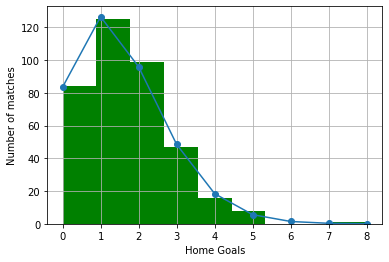

In [3]:
Matches.FTHG.hist(bins=9,color='green')
for i in range(x_home+1):
    homedensity = poisson.pmf(i, homepoissonparameter,loc=0)
    homepdf = numpy.append(homepdf,homedensity*rownet)
    print('Expected number of games for '+ str(i)+ ' home goals is ' +str(round(homedensity*rownet,4)))
plt.plot(range(x_home+1), homepdf,'-',marker='o', label='poisson pmf')
plt.xlabel("Home Goals")
plt.ylabel("Number of matches")
plt.show()
#Above I employ the poisson distribution density using poisson parameter belongs to home I found before, and find the expectation accordingly

Expected number of games  for 0 away goals is 113.853
Expected number of games  for 1 away goals is 137.2228
Expected number of games  for 2 away goals is 82.6948
Expected number of games  for 3 away goals is 33.223
Expected number of games  for 4 away goals is 10.0106
Expected number of games  for 5 away goals is 2.4131
Expected number of games  for 6 away goals is 0.4847
Expected number of games  for 7 away goals is 0.0835
Expected number of games  for 8 away goals is 0.0126
Expected number of games  for 9 away goals is 0.0017


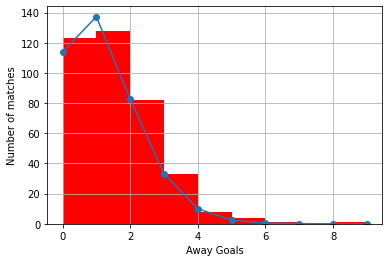

In [4]:
Matches.FTAG.hist(bins=9,color='red')
plt.xlabel("Away Goals")
plt.ylabel("Number of matches")
for i in range(x_away+1):
    awaydensity = poisson.pmf(i,awaypoissonparameter,loc=0)
    awaypdf= numpy.append(awaypdf,awaydensity*rownet)
    print('Expected number of games  for ' + str(i) + ' away goals is ' + str(round(awaydensity * rownet, 4)))
plt.plot(range(x_away+1), awaypdf,'-',marker='o', label='poisson pmf')
plt.show()

#Above I employ the poisson distribution density using poisson parameter belongs to away I found before, and find the expectation accordingly

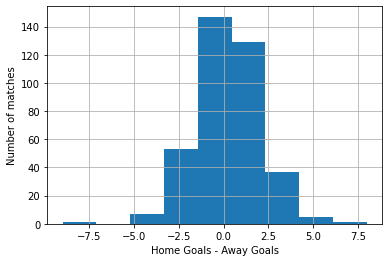

In [5]:
#plot the histogram of Home Goals - Away Goals
difference=Matches.FTHG-Matches.FTAG
difference.hist(bins=9)
plt.xlabel("Home Goals - Away Goals")
plt.ylabel("Number of matches")
plt.show()